# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
from pandas.api.types import (is_numeric_dtype,
                              CategoricalDtype)

# Load Dataset

In [2]:
os.chdir(r'C:\Users\LENOVO\Documents\Self Learn\Personal Project\Dataset')

In [3]:
loan_data = pd.read_csv('loan_data.csv')
loan_data.head().T

,0,1,2,3,4
person_age,22.0,21.0,25.0,23.0,24.0
person_gender,female,female,female,female,male
person_education,Master,High School,High School,Bachelor,Master
person_income,71948.0,12282.0,12438.0,79753.0,66135.0
person_emp_exp,0,0,3,0,1
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT
loan_amnt,35000.0,1000.0,5500.0,35000.0,35000.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL
loan_int_rate,16.02,11.14,12.87,15.23,14.27
loan_percent_income,0.49,0.08,0.44,0.44,0.53


# Data Inspection

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

<ul>
<li>The dataset is clean and completed without any missing value </li>
<li>Variables are comprehended in correct format with little action needed to be done </li>
<li> The dataset consists 45,000 entries in total. This includes 14 features with demographic informations such (age, gender, income, etc.), loan details (amount, intention, approval), and financial record(credit score, credit history)
</ul>

In [5]:
data_description = pd.DataFrame({
    'Type': loan_data.dtypes,
    'Qualitative/Quantitative': ['Qualitative' if var==object else 'Quantitative' for var, col in zip(loan_data.dtypes, loan_data.columns)],
    'Uniques': [len(loan_data[col].unique()) if dtype==object or col.find('loan_status')>=0  else '-' for col, dtype in zip(loan_data.columns, loan_data.dtypes)],
    'Min': [loan_data[col].min() if is_numeric_dtype(loan_data[col]) else '-' for col, dtype in zip(loan_data.columns, loan_data.dtypes)],
    'Max': [loan_data[col].max() if is_numeric_dtype(loan_data[col]) else '-' for col, dtype in zip(loan_data.columns, loan_data.dtypes)],
    'Avg':  [loan_data[col].mean() if is_numeric_dtype(loan_data[col]) else '-' for col, dtype in zip(loan_data.columns, loan_data.dtypes)],
    'Std': [loan_data[col].std().round(1) if is_numeric_dtype(loan_data[col]) else '-' for col, dtype in zip(loan_data.columns, loan_data.dtypes)], 
    'Missing': [loan_data[col].isnull().sum() for col in loan_data.columns]
}).sort_values(by='Qualitative/Quantitative')

data_description

,Type,Qualitative/Quantitative,Uniques,Min,Max,Avg,Std,Missing
person_gender,object,Qualitative,2,-,-,-,-,0
person_education,object,Qualitative,5,-,-,-,-,0
person_home_ownership,object,Qualitative,4,-,-,-,-,0
loan_intent,object,Qualitative,6,-,-,-,-,0
previous_loan_defaults_on_file,object,Qualitative,2,-,-,-,-,0
person_age,float64,Quantitative,-,20.0,144.0,27.764178,6.0,0
person_income,float64,Quantitative,-,8000.0,7200766.0,80319.053222,80422.5,0
person_emp_exp,int64,Quantitative,-,0,125,5.410333,6.1,0
loan_amnt,float64,Quantitative,-,500.0,35000.0,9583.157556,6314.9,0
loan_int_rate,float64,Quantitative,-,5.42,20.0,11.006606,3.0,0


<ul>
<li> There are 5 Qualitative variables in total, all can be treated as <span style='color:rgba(255, 178, 102, 1);font-weight:bold;'>categorial/ordinal </span> data. Additionally, there are 9 quantitative varialbes. Among these, <i style='color:rgba(250, 100, 108, 1);font-weight:bold;'>loan_int_rate</i> is expressed as percentage ranging from roughly 5% to 20%, while <i style='color:rgba(250, 100, 108, 1);font-weight:bold;'>loan_percent_income</i> is expressed as decimal value from 0 to 1 as percentage of loan over income. </li>
<li> <i style='color:rgba(250, 100, 108, 1);font-weight:bold;'>loan_status</i> is presented as integer 0 indicating rejection and 1 indicating approval of the loan

In [6]:
for col in loan_data.select_dtypes(include='object').columns:
    print(f'Unique values in {col}: {loan_data[col].unique()}')

Unique values in person_gender: ['female' 'male']
Unique values in person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Unique values in person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values in loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Unique values in previous_loan_defaults_on_file: ['No' 'Yes']


In [7]:
#Converting Quanlitative data to categorical data
education_ordinal = CategoricalDtype(categories=['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate'], ordered=True)
loan_data['person_education'] = loan_data['person_education'].astype(education_ordinal)
ownership_ordinal = CategoricalDtype(categories=['OTHER','RENT', 'MORTGAGE', 'OWN'], ordered=True)
loan_data['person_home_ownership'] = loan_data['person_home_ownership'].astype(ownership_ordinal)
loan_data[['person_gender','loan_intent','previous_loan_defaults_on_file']] = loan_data[['person_gender','loan_intent','previous_loan_defaults_on_file']].astype('category')

# Descriptive Analysis

In [8]:
loan_status_colors = {
    1: '#FFB266',
    0: '#85c1e9'
}

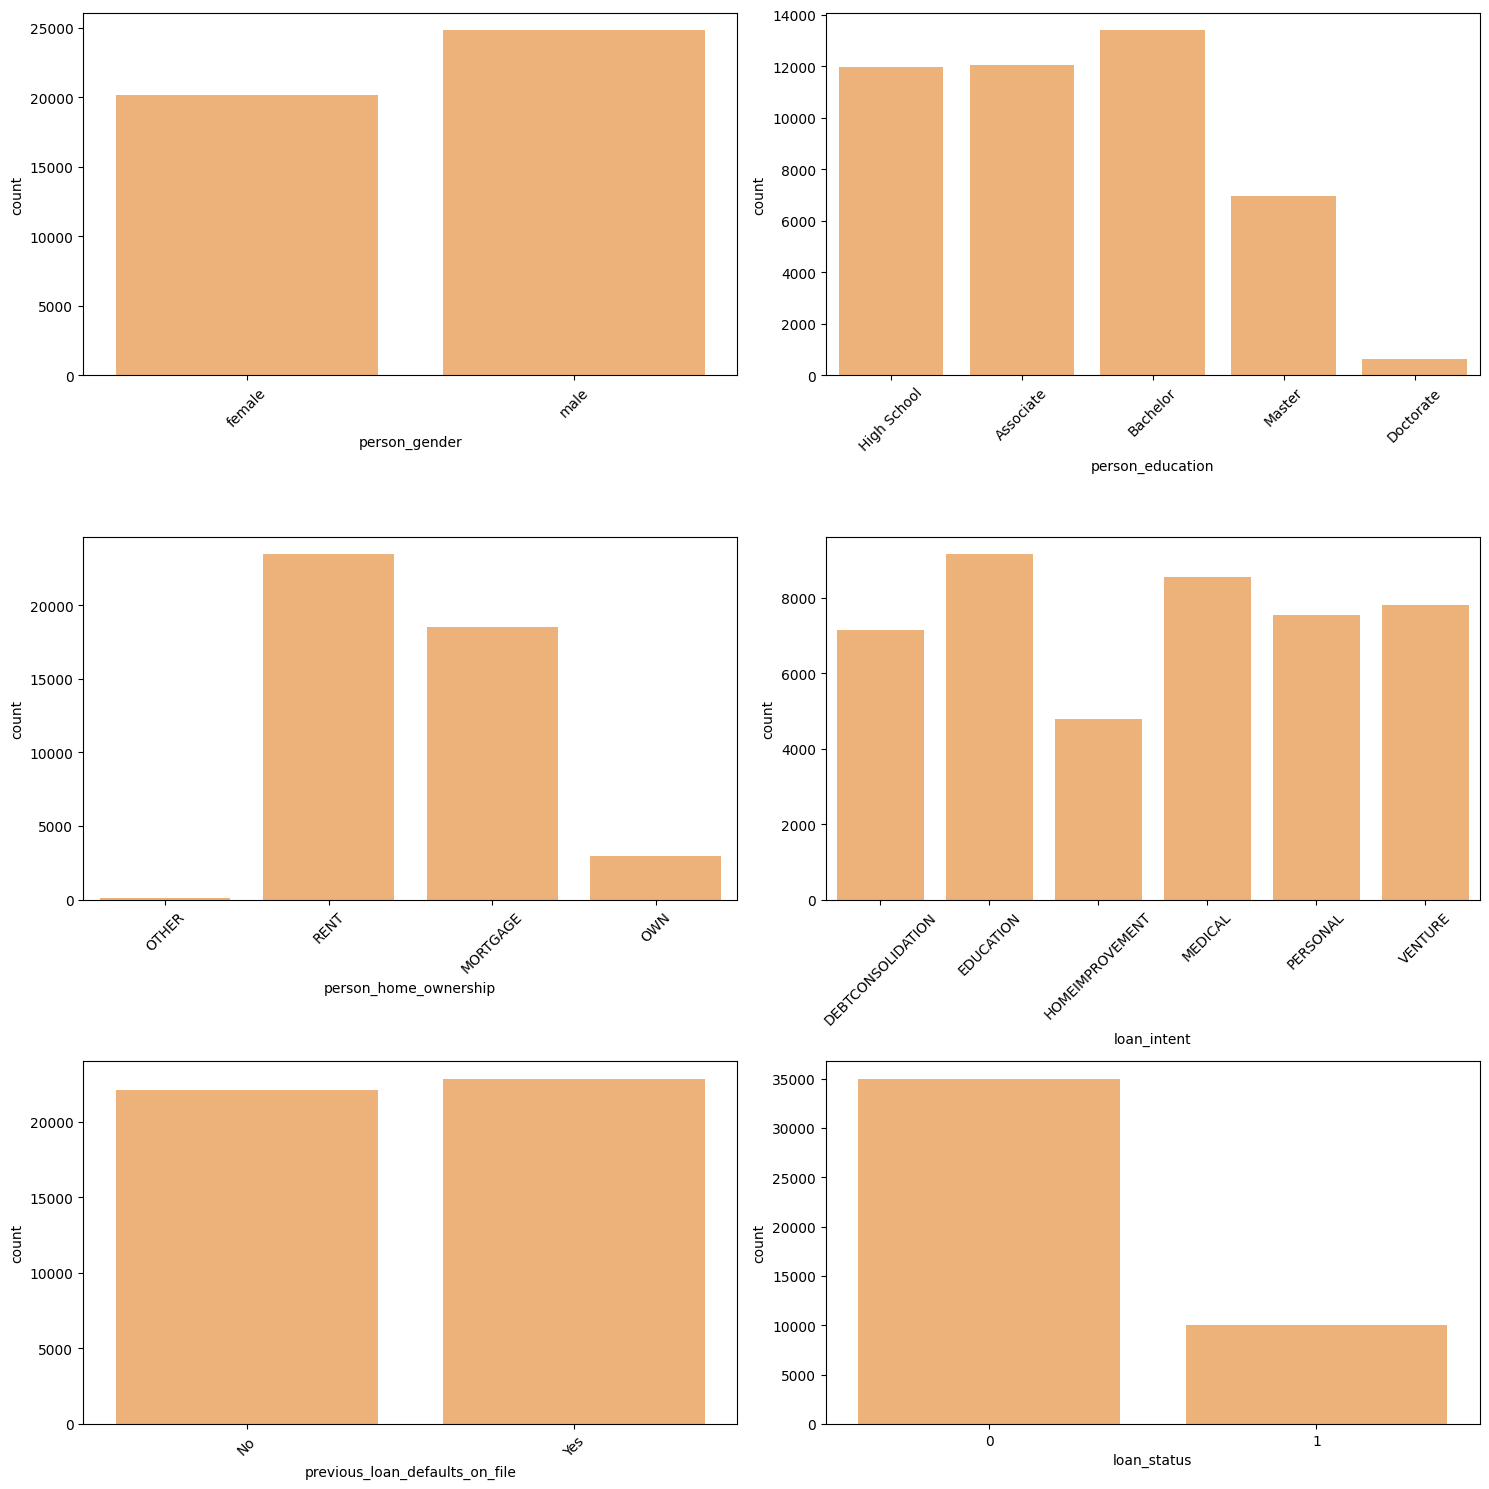

In [9]:
fig, ax = plt.subplots(3,2, figsize=(15,15))
ax = ax.flatten()
# Get categorical columns
cat_cols = list(loan_data.select_dtypes(include='category').columns)

for col in cat_cols:
    sns.countplot(data=loan_data, x=col, ax=ax[cat_cols.index(col)], color = '#FFB266')
    ax[cat_cols.index(col)].tick_params(axis='x', rotation=45)

sns.countplot(data=loan_data, x='loan_status', ax=ax[5], color = '#FFB266')    
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


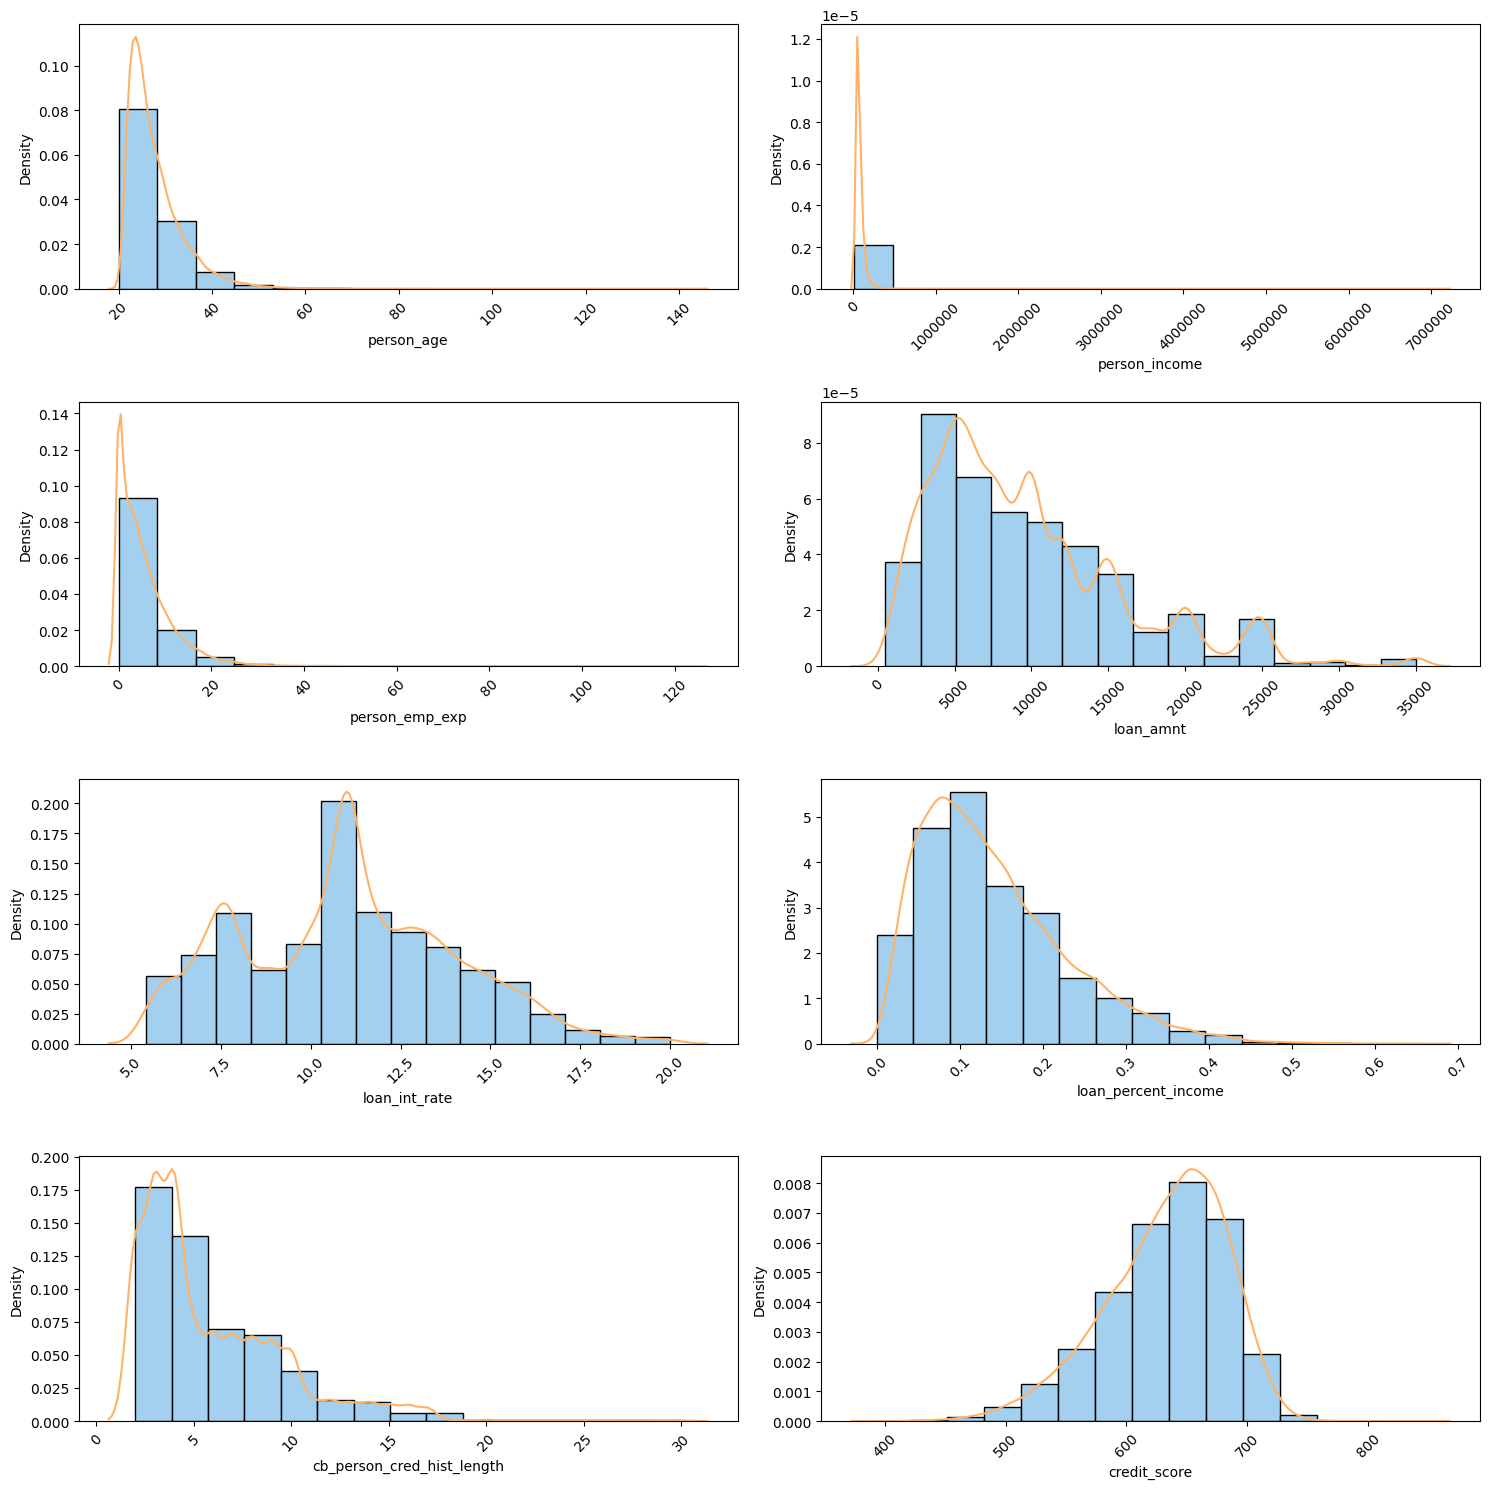

In [10]:
fig, ax = plt.subplots(4, 2, figsize=(15,15))
ax = ax.flatten()

# Get numerical columns, excluding 'loan_status'
num_cols = list(loan_data.select_dtypes(include='number').columns)

for i, col in enumerate(num_cols):
    if col == 'loan_status':
        continue
    sns.histplot(data=loan_data, x=col, color = '#85c1e9', kde = False, stat = 'density', ax = ax[i], bins = 15)
    sns.kdeplot(data=loan_data, x=col, color = '#FFB266', ax=ax[i])
    
    ax[i].tick_params(axis='x', rotation=45) #Rotate x-axis labels to avoid overlap

    # Convert xaxis  to human readable format
    ax[i].get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax[i].get_xaxis().get_major_formatter().set_useOffset(False)
    ax[i].get_xaxis().get_major_formatter().set_scientific(False)
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

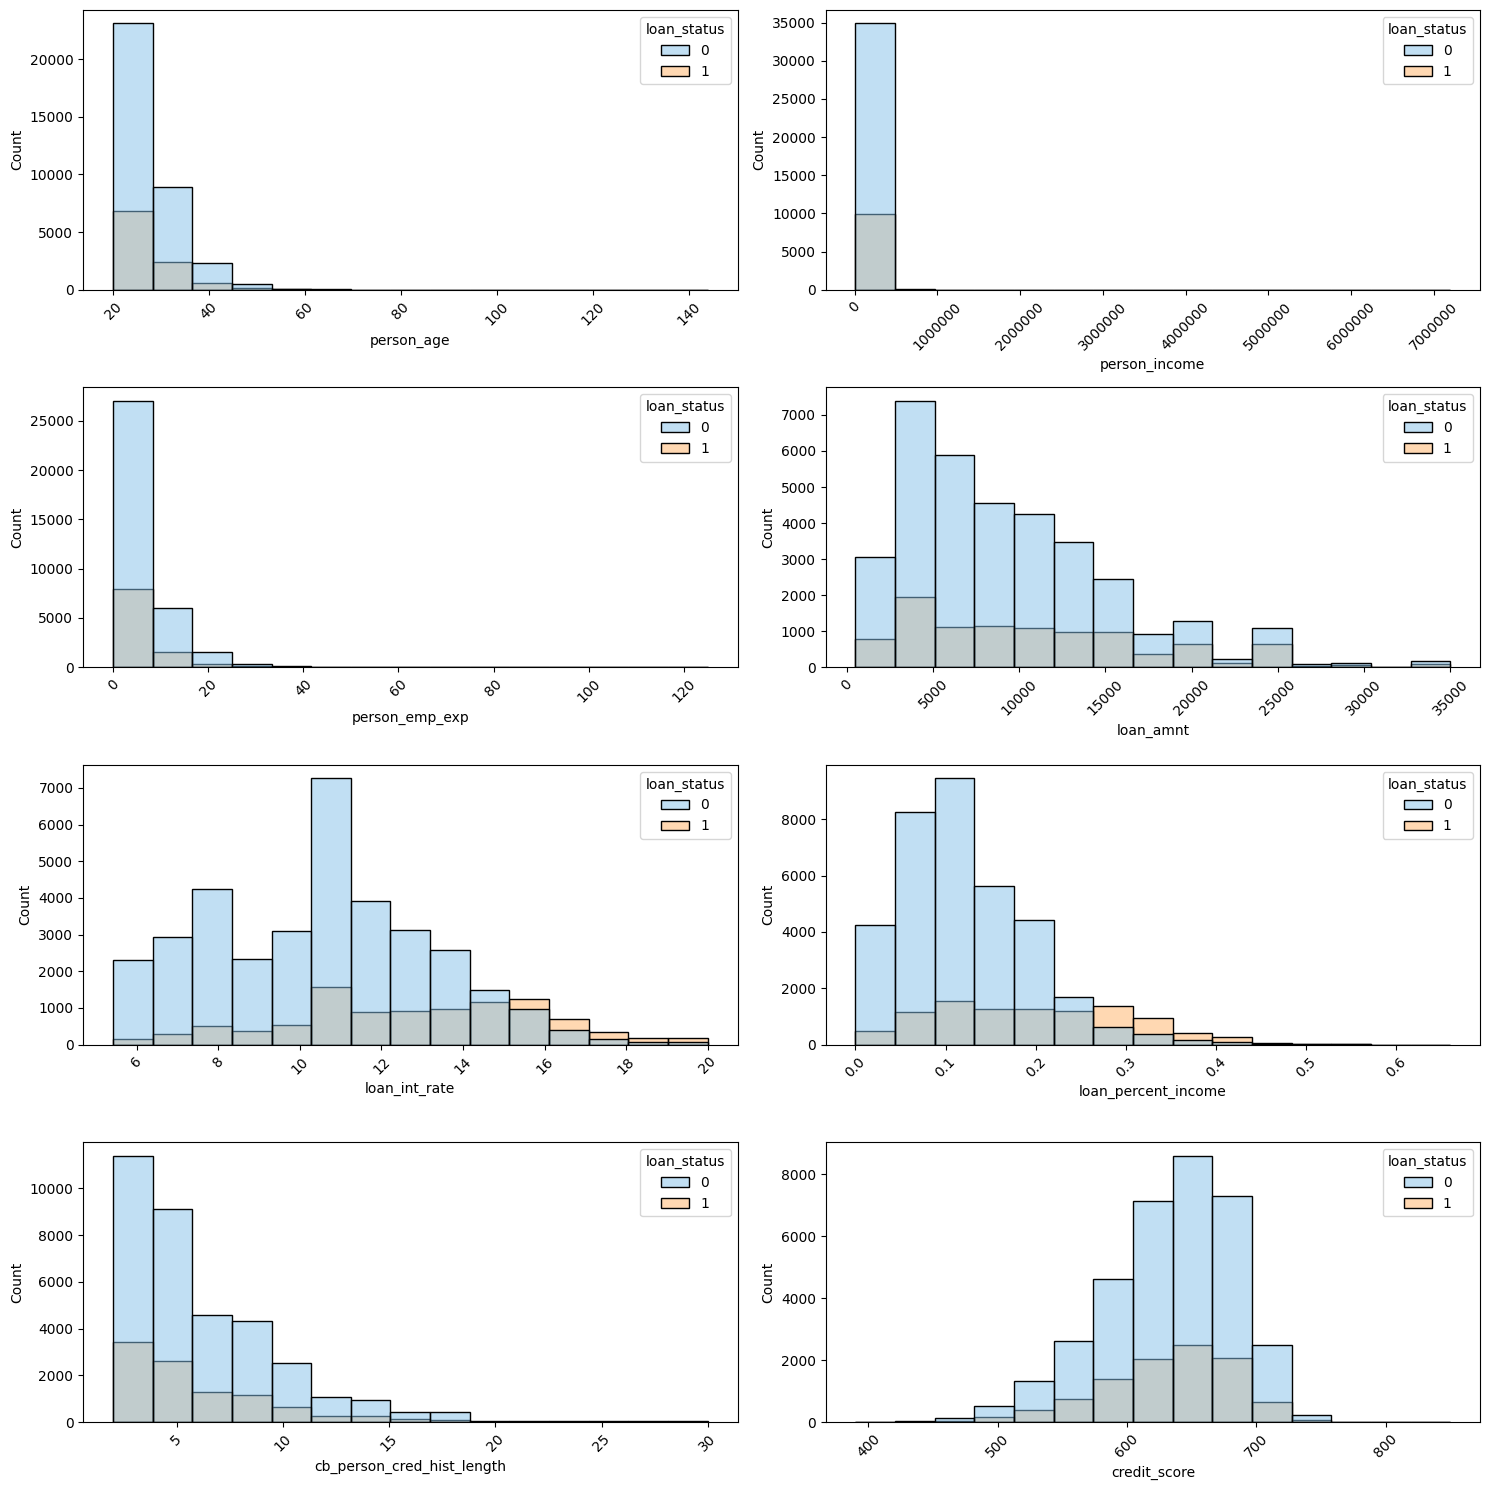

In [11]:
fig, ax = plt.subplots(4, 2, figsize=(15,15))
ax = ax.flatten()

# Get numerical columns, excluding 'loan_status'
num_cols = list(loan_data.select_dtypes(include='number').columns)

for i, col in enumerate(num_cols):
    if col == 'loan_status':
        continue
    sns.histplot(data=loan_data, x=col, hue='loan_status',ax = ax[i], palette = loan_status_colors, bins = 15) #Histogram plot but with different view of approval and rejection
    
    ax[i].tick_params(axis='x', rotation=45) #Rotate x-axis labels to avoid overlap
    
    # Convert xaxis  to human readable format
    ax[i].get_xaxis().set_major_formatter(plt.ScalarFormatter())
    ax[i].get_xaxis().get_major_formatter().set_useOffset(False)
    ax[i].get_xaxis().get_major_formatter().set_scientific(False)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3244\1291704392.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df = loan_data.groupby([col, 'loan_status']).size().reset_index(name='count')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3244\1291704392.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df['percentage'] = temp_df['count'] / temp_df.groupby(col)['count'].transform('sum') * 100
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3244\1291704392.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to ret

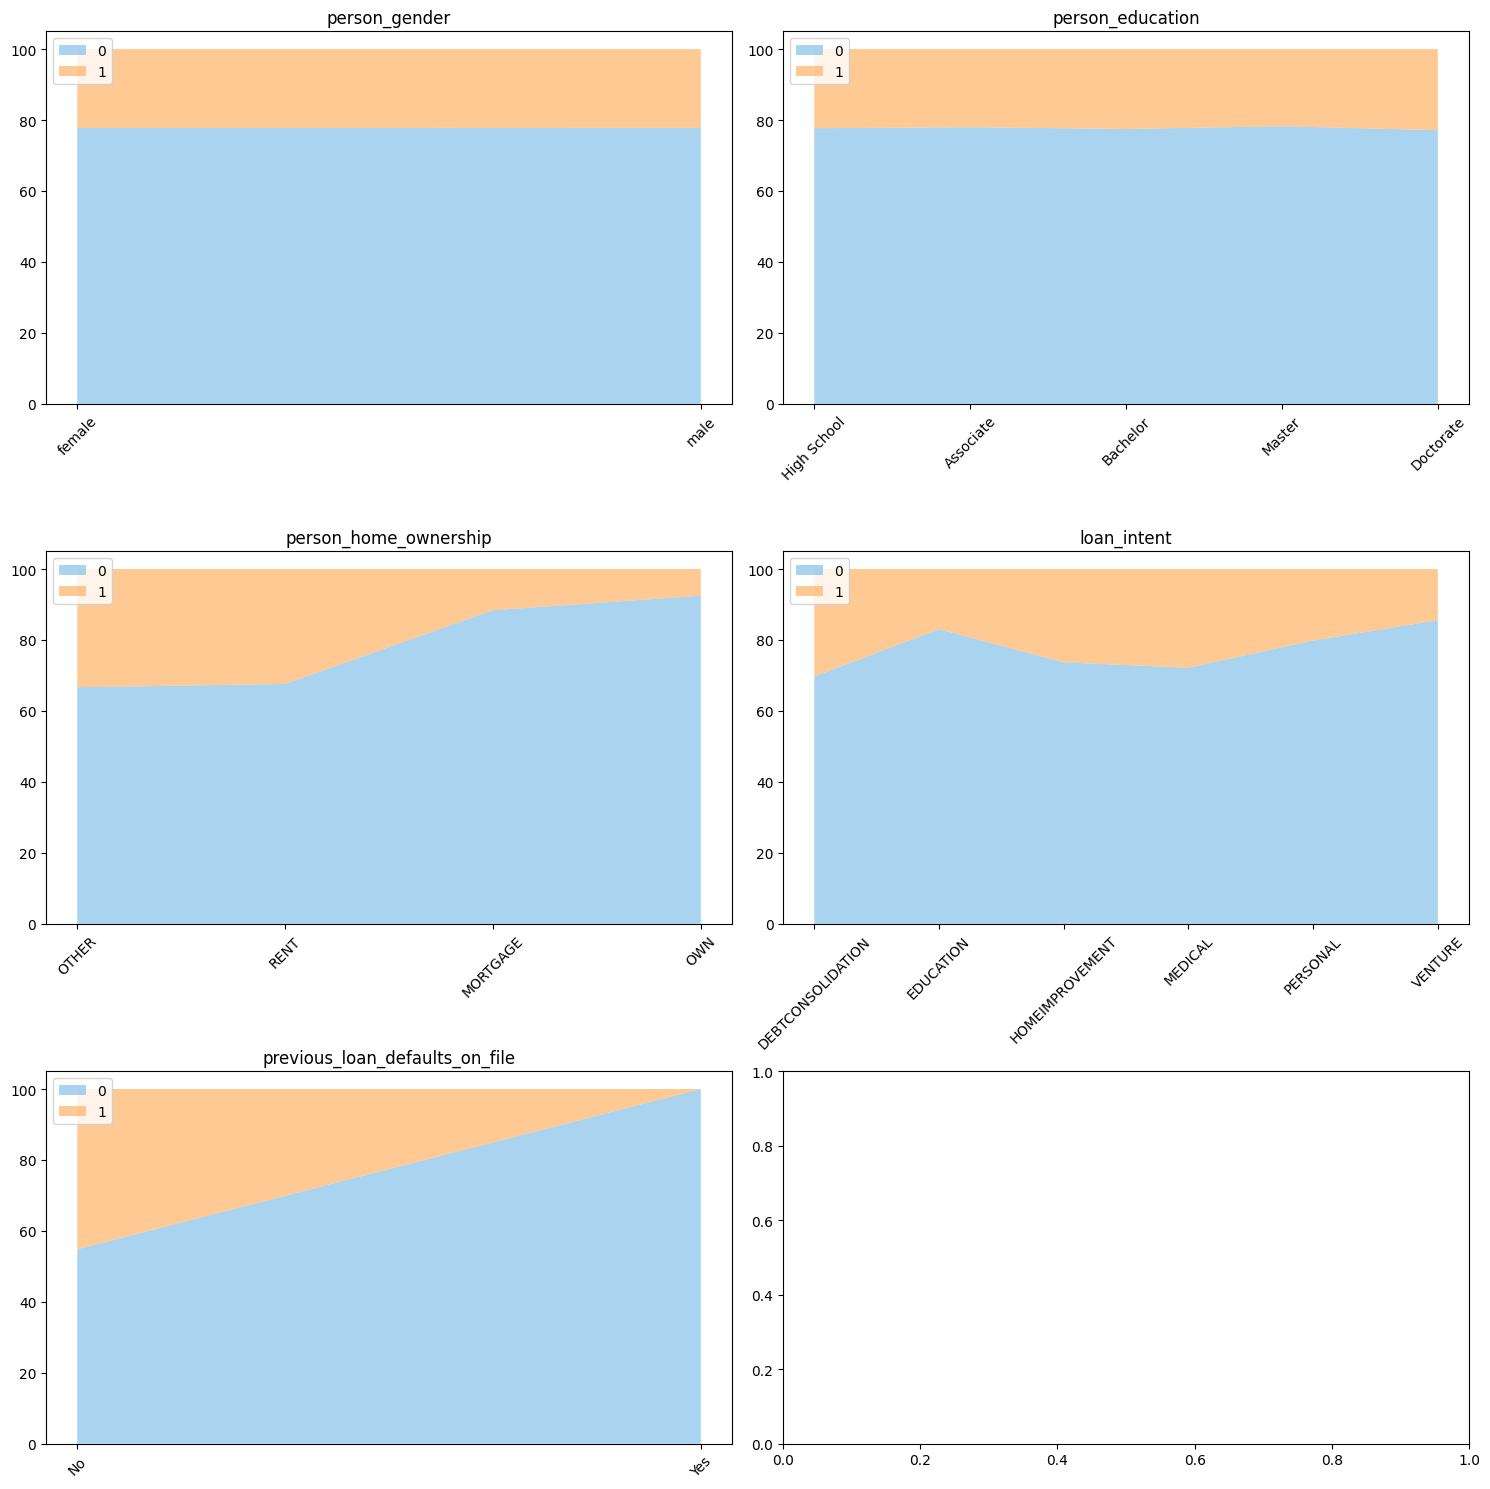

In [12]:
fig, ax = plt.subplots(3,2, figsize=(15,15))
ax = ax.flatten()
# Get categorical columns
cat_cols = list(loan_data.select_dtypes(include='category').columns)

for i, col in enumerate(cat_cols):
    temp_df = loan_data.groupby([col, 'loan_status']).size().reset_index(name='count')
    temp_df['percentage'] = temp_df['count'] / temp_df.groupby(col)['count'].transform('sum') * 100
    pivot_df = temp_df.pivot(index = col, columns ='loan_status', values='percentage')
    colors = [loan_status_colors[status] for status in pivot_df.columns] #Set color following color scheme
    ax[i].stackplot(pivot_df.index, pivot_df.T, labels = pivot_df.columns, colors = colors, alpha = 0.7)
    ax[i].tick_params(axis='x', rotation=45)
    ax[i].legend(loc='upper left')
    ax[i].title.set_text(f'{col}')
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3244\3643805924.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_intention = loan_data.groupby(['age_group', 'loan_intent']).agg(


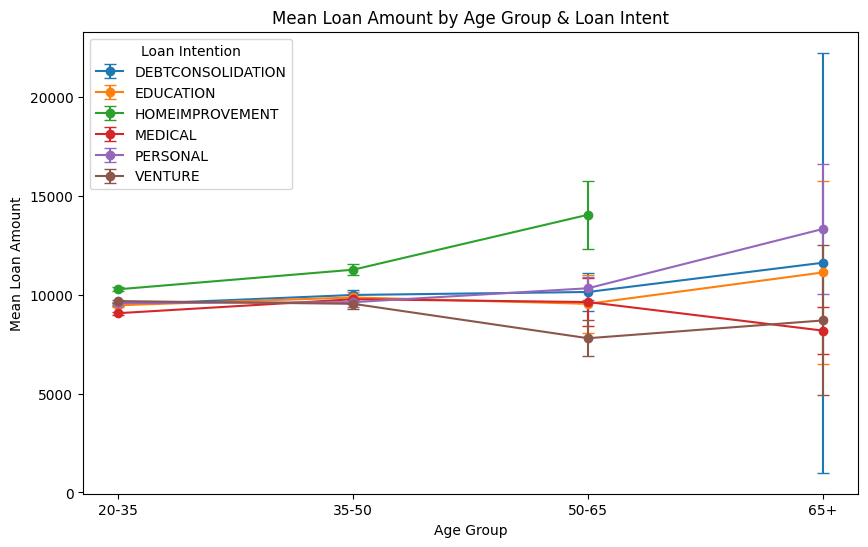

In [20]:
loan_data['age_group'] = pd.cut(loan_data['person_age'], bins = [20,35,50,65,145], labels =[ '20-35', '35-50', '50-65', '65+'])
age_intention = loan_data.groupby(['age_group', 'loan_intent']).agg(
    mean_amount=('loan_amnt', 'mean'),
    std_amount=('loan_amnt', 'std'),
    count=('loan_amnt', 'count')
    ).assign(se_amount=lambda x: x['std_amount'] / np.sqrt(x['count'])).reset_index()

plt.figure(figsize=(10, 6))

for intent in age_intention['loan_intent'].unique():
    df_temp = age_intention[age_intention['loan_intent'] == intent]
    
    plt.errorbar(
        x=df_temp['age_group'], 
        y=df_temp['mean_amount'], 
        yerr=df_temp['se_amount'],
        label=intent, 
        fmt='-o',  # Line with circle markers
        capsize=4  # Error bar caps
    )

plt.xlabel("Age Group")
plt.ylabel("Mean Loan Amount")
plt.title("Mean Loan Amount by Age Group & Loan Intent")
plt.legend(title="Loan Intention")
plt.grid(False)
plt.show()